# Univariate Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Data
I have selected housing data in which different features of the houses and their prices are given.

In [2]:
df = pd.read_csv('data/LinearRegression_kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,7129300520,20141013T000000,221900,3,1.00,1180.0,5650,1.0,0,0,3,7,1180,0,1955.0,NaN,98178.0,47.5112,-122.257
1,6414100192,20141209T000000,538000,3,2.25,2570.0,7242,2.0,0,0,3,7,2170,400,1951.0,1991.0,98125.0,47.7210,-122.319
2,5631500400,20150225T000000,180000,2,1.00,770.0,10000,1.0,0,0,3,6,770,0,1933.0,NaN,98028.0,47.7379,-122.233
3,2487200875,20141209T000000,604000,4,3.00,1960.0,5000,1.0,0,0,5,7,1050,910,1965.0,NaN,98136.0,47.5208,-122.393
4,1954400510,20150218T000000,510000,3,2.00,1680.0,8080,1.0,0,0,3,8,1680,0,1987.0,NaN,98074.0,47.6168,-122.045


### Feature Selection
Since we are doing Simple Linear Regression, so, we have to select only one feature for the model to predict the price of the house. I have selected "sqft_living" for this as you can see positive the relationship between "sqft_living" and "price" in the following plot.

In [93]:
df = df[['sqft_living', 'price']].dropna()     #Data Cleaning
df.head()

,sqft_living,price
0,1180.0,221900
1,2570.0,538000
2,770.0,180000
3,1960.0,604000
4,1680.0,510000


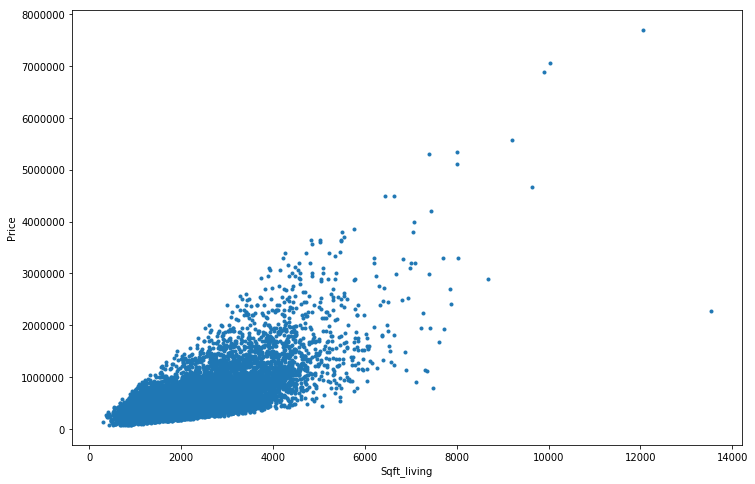

In [95]:
plt.figure(figsize=(12,8))
plt.xlabel('Sqft_living')
plt.ylabel('Price')
plt.plot(df['sqft_living'], df['price'], '.')

### Train and Test Data
I am using 80% of the data for training and 20% of the data for testing purposes

In [70]:
x_train, x_test, y_train, y_test = [x.reshape(-1,1) for x in 
                                    train_test_split(np.array(df['sqft_living']), np.array(df['price']), test_size=0.2)]
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(17284, 1) (4321, 1) (17284, 1) (4321, 1)


### Linear Regression using sklearn

Training the model

In [156]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

0.4874355354605707

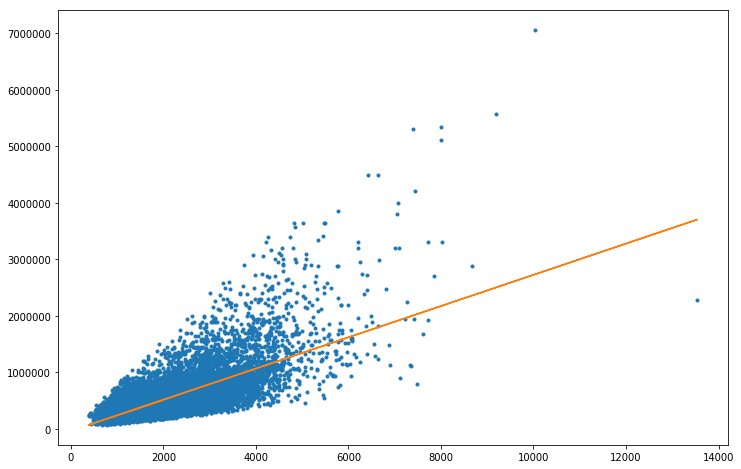

In [159]:
plt.figure(figsize=(12,8))
plt.plot(x_train, y_train, '.', x_train, model.predict(x_train))    # Training Data fit
model.score(x_train, y_train)

0.5113542852570166

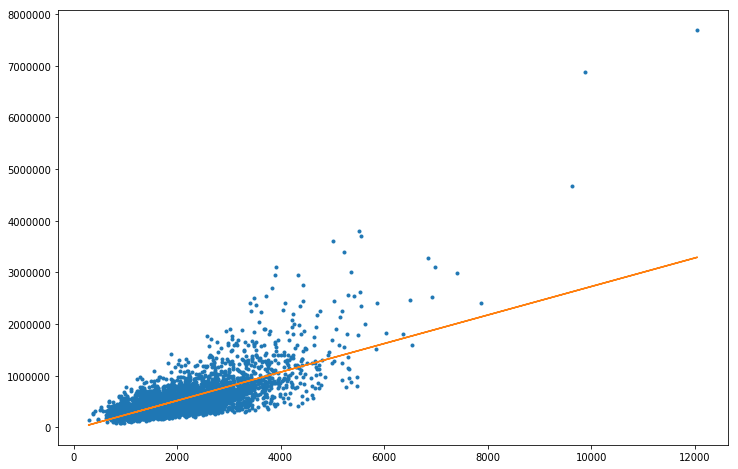

In [160]:
plt.figure(figsize=(12,8))
plt.plot(x_test, y_test, '.', x_test, model.predict(x_test))  # Test Data fit
model.score(x_test, y_test)

### Analytical / Closed form solution using numpy

In [219]:
X = np.hstack((x_train, np.ones((x_train.shape[0], 1))))      # Adding a column of ones for intercept
w, b = ((np.linalg.inv(X.T.dot(X))).dot(X.T)).dot(y_train)
w, b = w[0], b[0]
w, b

(276.1289881838139, -34359.745645963325)

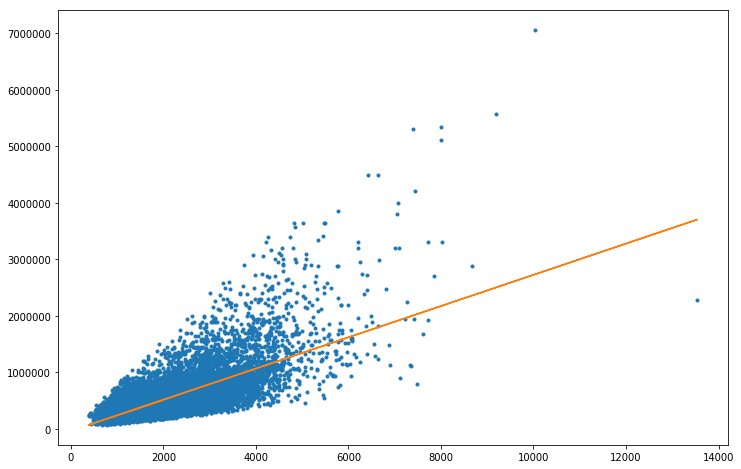

In [222]:
plt.figure(figsize=(12,8))
plt.plot(x_train, y_train, '.', x_train, np.dot(X, [w,b]))    # Training Data fit

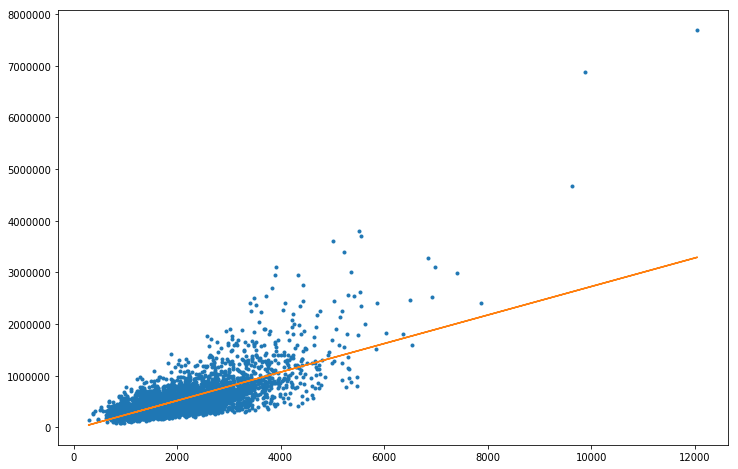

In [223]:
plt.figure(figsize=(12,8))
plt.plot(x_test, y_test, '.', x_test, np.dot(np.hstack((x_test, np.ones((x_test.shape[0],1))))
                                                         , [w,b]))  # Test Data fit

### Iterative solution using numpy
The builtin machine learning libraries use vectorized code for computation which is highly optimized and very fast. My code contains loops so I am choosing relatively small dataset for this purpose.

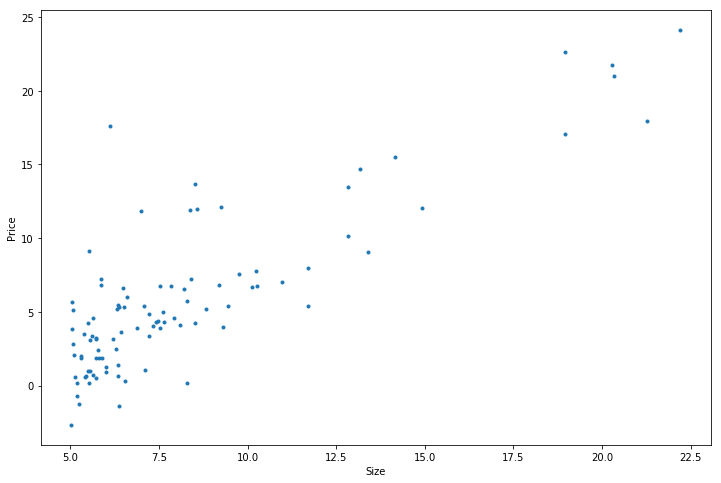

In [3]:
df = pd.read_csv('data/housing_data_small.csv', header=None)
plt.figure(figsize=(12,8))
plt.xlabel('Size')
plt.ylabel('Price')
plt.plot(df[0], df[1], '.')

(77, 1) (20, 1) (77, 1) (20, 1)


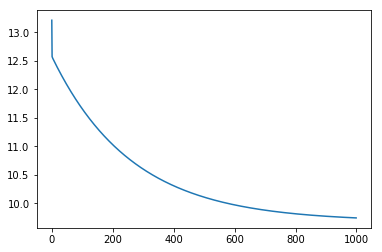

In [248]:

x_train, x_test, y_train, y_test = [x.reshape(-1,1) for x in
                                    train_test_split(np.array(df[0]), np.array(df[1]), test_size=0.2)]
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

X = np.hstack((x_train, np.ones((x_train.shape[0], 1))))      # Adding a column of ones for intercept


w, b = 0,0
numIter = 1000
learning_rate = 0.01
costs = []
tw, tb = w, b
for iter in range(numIter):
    t1 = 0
    t2 = 0

    for i in range(X.shape[0]):
        t1 += (np.dot(X[i,:], [w,b]) - y_train[i])*X[i,0]
        t2 += (np.dot(X[i, :], [w, b]) - y_train[i]) * X[i, 1]

    tw = w - learning_rate * t1 / X.shape[0]
    tb = b - learning_rate * t2 / X.shape[0]

    w = tw
    b = tb

    costs.append(np.average(np.square(np.dot(X, [w,b]) - y_train)))
    
plt.plot(costs)

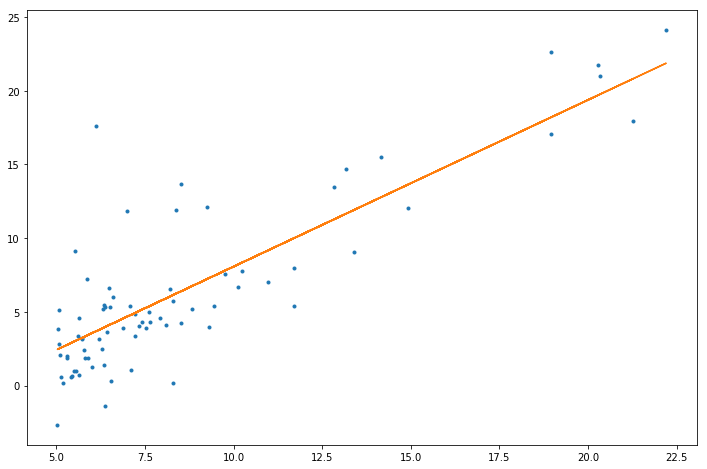

In [249]:
plt.figure(figsize=(12,8))
plt.plot(x_train, y_train, '.', x_train, np.dot(X, [w,b]))    # Training Data fit

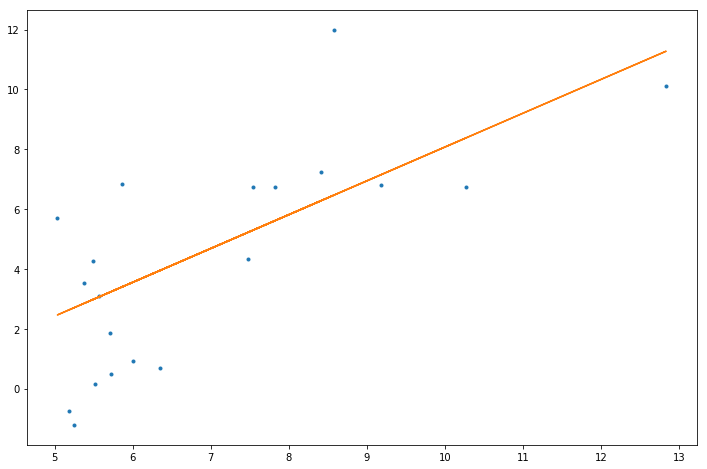

In [250]:
plt.figure(figsize=(12,8))
plt.plot(x_test, y_test, '.', x_test, np.dot(np.hstack((x_test, np.ones((x_test.shape[0],1))))
                                                         , [w,b]))  # Test Data fit

### Linear Regression on synthetic data

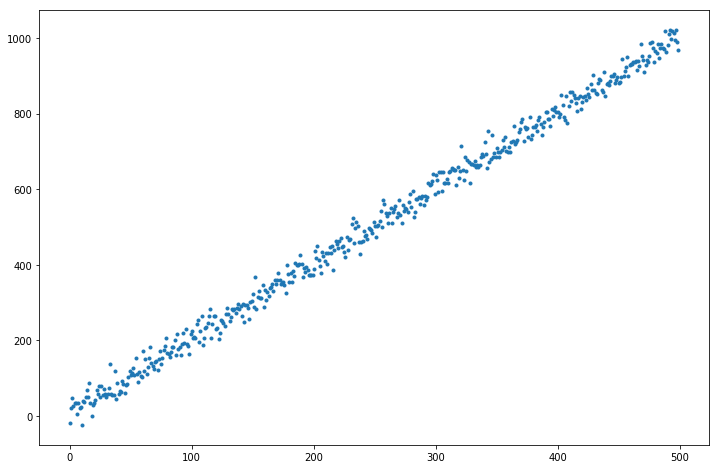

In [138]:
x = np.arange(500).reshape((-1,1))
y =  2 * x + 5
y = y + np.random.randn(x.shape[0],1) * 20       # Adding noise to data
plt.figure(figsize=(12,8))
plt.plot(x[:,0], y[:,0], '.')

In [139]:
x = np.hstack((np.ones((x.shape[0],1)), x))             # Adding column of ones to data for intercept
W = np.zeros((2,1))                             # Slope and Intercept

In [171]:
learning_rate = 0.01
tolerance = 0.1
max_iter = 1000
max_grad = 100
derivs = []
for iter_i in range(max_iter):
    pred = np.matmul(x, W)
    error = pred - y
    db = np.sum(error)                             # Partial Derivative w.r.t intercept
    dw = np.sum(np.multiply(error, x[:,1]))        # Partial Derivative w.r.t slope
    db = np.clip(db, -max_grad, max_grad)          # Avoiding Vanishing/Exploding Gradients
    dw = np.clip(dw, -max_grad, max_grad)
    W[0] = W[0] - learning_rate * db
    W[1] = W[1] - learning_rate * dw
    derivative_magnitude = np.linalg.norm(W)
    derivs.append(derivative_magnitude)
    if derivative_magnitude < tolerance:
        break

In [172]:
print(W)

[[2.]
 [2.]]


We can see that the slope returned by the model is exactly the same. The intercept is slightly different due to the noise added in the data.

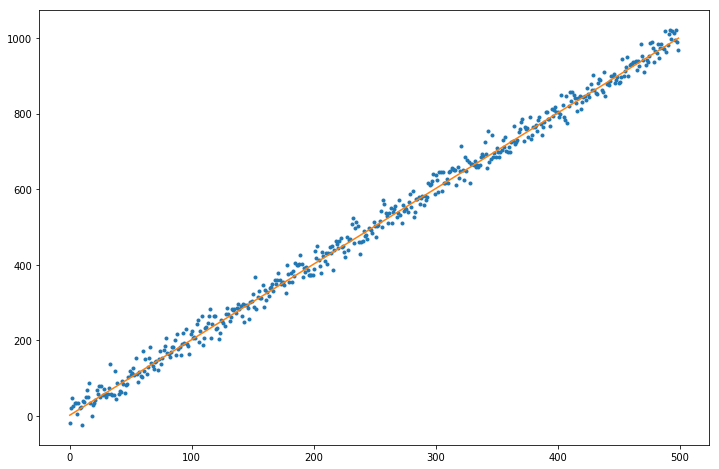

In [173]:
plt.figure(figsize=(12,8))
plt.plot(x[:,1], y[:,0], '.', x[:,1], np.matmul(x, W)[:,0])

In [ ]:
df = pd.read_csv('data/LinearRegression_kc_house_data.csv')
